# Feature Manipulation and Selection using the Feature Importance built-in function in RFR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# library for data analsysis
import numpy as np

# library to handle data in a vectorized manner
import pandas as pd

## Matplotlib and associated plotting modules
import matplotlib.pyplot as plt

# To access statistics functions
import scipy.stats as ss

# import RFRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from math import sqrt


%matplotlib inline

## Upload the data

In [3]:
df = pd.read_csv('Diet_R.csv')
df.head(5)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,0,41,171,60,2,60.0
1,26,0,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


Select the x-input and y-output values using location function

In [46]:
X = df.iloc[:, 1:6]
Y = np.asarray(df.iloc[:, 6]).reshape(-1,1)
print (X) # show the selected variables 


    gender  Age  Height  pre.weight  Diet
0        0   41     171          60     2
1        0   32     174         103     2
2        0   22     159          58     1
3        0   46     192          60     1
4        0   55     170          64     1
..     ...  ...     ...         ...   ...
73       1   35     183          83     3
74       1   49     177          84     3
75       1   28     164          85     3
76       1   40     167          87     3
77       1   51     175          88     3

[78 rows x 5 columns]


In [47]:
#Split is done 75% - 25% by default
# Set 70% for training the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70, random_state=0)

In [48]:
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)
X_test = scaler.fit_transform(X_test)
Y_test = scaler.fit_transform(Y_test)

Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

Train the RFR model

In [49]:
RFR = RandomForestRegressor(n_estimators=150, random_state=20)
RFR = RFR.fit(X_train, Y_train)

Fit the model using only the x-inputs of the training data and testing data

In [50]:
RFR_train = RFR.predict(X_train)
RFR_test = RFR.predict(X_test)

Data visualisation to determine the accuracy of the developed model against the training and testing data sing the scatter plot

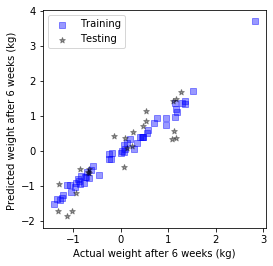

In [54]:
plt.figure(figsize=(4,4))
plt.scatter(RFR_train,Y_train, alpha=0.4, color='blue',marker='s',label='Training')
plt.scatter(RFR_test,Y_test, alpha=0.4, color='black', marker='*',label='Testing')
plt.ylabel('Predicted weight after 6 weeks (kg) ')
plt.xlabel('Actual weight after 6 weeks (kg)')
plt.legend()
plt.show()

Feature importance function determine the significant function of input variables

In [55]:
RFR.feature_importances_

array([0.00547026, 0.02248755, 0.01030641, 0.95343612, 0.00829966])

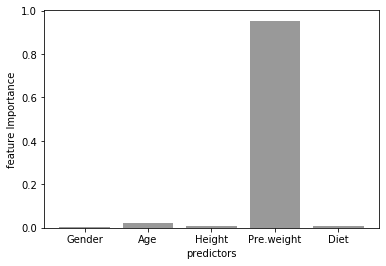

In [56]:
yo = [0.00547026, 0.02248755, 0.01030641, 0.95343612, 0.00829966]
# p_all # Gender, Age, Height, Pre.weight and Diet  
yt = ['Gender','Age','Height','Pre.weight','Diet' ]
plt.bar(yt, yo, alpha=0.4, color='black')
plt.ylabel('feature Importance')
plt.xlabel('predictors')
plt.savefig('ag_bar.svg')
plt.show()

In [ ]:
Data visualisation using Histogram

In [57]:
len(X_test)

24

In [58]:
len(X_train)

54

In [59]:
RFR.score(X_train,Y_train)

0.9736382928721609

In [60]:
RFR.score(X_test,Y_test)

0.8068905169140292